In [2]:
%pip install super-gradients
%pip install torch
%pip install supervision
%pip install roboflow
%pip install onemetric
%cd /content/drive/MyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 110.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.5 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="OZmt7veKofDCRjgyQ5XE")
project = rf.workspace("csilab").project("csilab-braintumor-detection")
dataset = project.version(2).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to CsiLab-BrainTumor-Detection-2 in yolov8:: 100%|██████████| 1356/1356 [00:00<00:00, 8689.94it/s]


In [4]:
import torch
from super_gradients.training import Trainer

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 8
MAX_EPOCHS = 15
CHECKPOINT_DIR = './checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

LOCATION = dataset.location
CLASSES = sorted(project.classes.keys())

dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}
print(dataset_params['classes'])


[2023-10-19 13:49:56] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-10-19 13:49:56] WARNING - __init__.py - Failed to import pytorch_quantization
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 54.0MB/s]
[2023-10-19 13:50:06] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-10-19 13:50:06] WARNING - export.py - Failed to import pytorch_quantization
[2023-10-19 13:50:06] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-10-19 13:50:06] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-10-19 13:50:06] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-10-19 13:50:06] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-10-19 13:50:06] WARNING - env_sanity_check.py - Failed to verify

['Tumor']


In [5]:
from super_gradients.training.dataloaders.dataloaders import (coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-10-19 13:50:15] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 582/582 [00:00<00:00, 3697.45it/s]
[2023-10-19 13:50:15] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 60/60 [00:00<00:00, 3669.88it/s]
[2023-10-19 13:50:15] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.


In [6]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-10-19 13:50:21] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:01<00:00, 143MB/s]
[2023-10-19 13:50:23] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [7]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [ ]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

[2023-10-18 16:27:46] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231018_162746_414674`
[2023-10-18 16:27:46] INFO - sg_trainer.py - Checkpoints directory: ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674
[2023-10-18 16:27:46] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.


The console stream is now moved to ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/console_Oct18_16_27_46.txt


[2023-10-18 16:27:47] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 582        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         72         (len(train_loader))
    - Gradient updates per epoch:   72         (len(train_loader) / batch_accumulate)

[2023-10-18 16:27:47] INFO - sg_trainer.py - Started training for 15 epochs (0/14)

Validating: 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]
[2023-10-18 16:29:04] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.4418
│   ├── Ppyoloeloss/loss_iou = 0.2574
│   ├── Ppyoloeloss/loss_dfl = 1.461
│   └── Ppyoloeloss/loss = 3.8158
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.506
    ├── Ppyoloeloss/loss_iou = 0.1829
    ├── Ppyoloeloss/loss_dfl = 1.1569
    ├── Ppyoloeloss/loss = 3.5417
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0221
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]
[2023-10-18 16:30:14] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:30:14] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8126352429389954


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1571
│   │   ├── Epoch N-1      = 2.4418 (↘ -1.2848)
│   │   └── Best until now = 2.4418 (↘ -1.2848)
│   ├── Ppyoloeloss/loss_iou = 0.2029
│   │   ├── Epoch N-1      = 0.2574 (↘ -0.0545)
│   │   └── Best until now = 0.2574 (↘ -0.0545)
│   ├── Ppyoloeloss/loss_dfl = 1.193
│   │   ├── Epoch N-1      = 1.461  (↘ -0.2681)
│   │   └── Best until now = 1.461  (↘ -0.2681)
│   └── Ppyoloeloss/loss = 2.2607
│       ├── Epoch N-1      = 3.8158 (↘ -1.5551)
│       └── Best until now = 3.8158 (↘ -1.5551)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4088
    │   ├── Epoch N-1      = 2.506  (↘ -1.0972)
    │   └── Best until now = 2.506  (↘ -1.0972)
    ├── Ppyoloeloss/loss_iou = 0.1604
    │   ├── Epoch N-1      = 0.1829 (↘ -0.0225)
    │   └── Best until now = 0.1829 (↘ -0.0225)
    ├── Ppyoloeloss/loss_dfl = 1.1404
    │   ├── Epoch N-1      = 1.1569 (↘ -0.0165)
    │   └── Best until now = 1.1569 (↘ -0.0165)
    ├── Ppyoloeloss/los

Validating epoch 2: 100%|██████████| 8/8 [00:03<00:00,  2.40it/s]
[2023-10-18 16:31:35] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:31:35] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8433739542961121


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0241
│   │   ├── Epoch N-1      = 1.1571 (↘ -0.133)
│   │   └── Best until now = 1.1571 (↘ -0.133)
│   ├── Ppyoloeloss/loss_iou = 0.2049
│   │   ├── Epoch N-1      = 0.2029 (↗ 0.002)
│   │   └── Best until now = 0.2029 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 1.2418
│   │   ├── Epoch N-1      = 1.193  (↗ 0.0488)
│   │   └── Best until now = 1.193  (↗ 0.0488)
│   └── Ppyoloeloss/loss = 2.1572
│       ├── Epoch N-1      = 2.2607 (↘ -0.1035)
│       └── Best until now = 2.2607 (↘ -0.1035)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1487
    │   ├── Epoch N-1      = 1.4088 (↘ -0.2601)
    │   └── Best until now = 1.4088 (↘ -0.2601)
    ├── Ppyoloeloss/loss_iou = 0.1686
    │   ├── Epoch N-1      = 0.1604 (↗ 0.0082)
    │   └── Best until now = 0.1604 (↗ 0.0082)
    ├── Ppyoloeloss/loss_dfl = 1.1772
    │   ├── Epoch N-1      = 1.1404 (↗ 0.0368)
    │   └── Best until now = 1.1404 (↗ 0.0368)
    ├── Ppyoloeloss/loss = 2.1587


Validating epoch 3: 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0191
│   │   ├── Epoch N-1      = 1.0241 (↘ -0.0049)
│   │   └── Best until now = 1.0241 (↘ -0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.2089
│   │   ├── Epoch N-1      = 0.2049 (↗ 0.004)
│   │   └── Best until now = 0.2029 (↗ 0.006)
│   ├── Ppyoloeloss/loss_dfl = 1.2621
│   │   ├── Epoch N-1      = 1.2418 (↗ 0.0203)
│   │   └── Best until now = 1.193  (↗ 0.0691)
│   └── Ppyoloeloss/loss = 2.1723
│       ├── Epoch N-1      = 2.1572 (↗ 0.0151)
│       └── Best until now = 2.1572 (↗ 0.0151)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0046
    │   ├── Epoch N-1      = 1.1487 (↘ -0.1441)
    │   └── Best until now = 1.1487 (↘ -0.1441)
    ├── Ppyoloeloss/loss_iou = 0.1898
    │   ├── Epoch N-1      = 0.1686 (↗ 0.0213)
    │   └── Best until now = 0.1604 (↗ 0.0294)
    ├── Ppyoloeloss/loss_dfl = 1.2858
    │   ├── Epoch N-1      = 1.1772 (↗ 0.1086)
    │   └── Best until now = 1.1404 (↗ 0.1454)
    ├── Ppyoloeloss/loss = 2.1221


Validating epoch 4: 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]
[2023-10-18 16:34:11] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:34:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8594447374343872


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9881
│   │   ├── Epoch N-1      = 1.0191 (↘ -0.0311)
│   │   └── Best until now = 1.0191 (↘ -0.0311)
│   ├── Ppyoloeloss/loss_iou = 0.2037
│   │   ├── Epoch N-1      = 0.2089 (↘ -0.0052)
│   │   └── Best until now = 0.2029 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_dfl = 1.241
│   │   ├── Epoch N-1      = 1.2621 (↘ -0.021)
│   │   └── Best until now = 1.193  (↗ 0.0481)
│   └── Ppyoloeloss/loss = 2.1179
│       ├── Epoch N-1      = 2.1723 (↘ -0.0545)
│       └── Best until now = 2.1572 (↘ -0.0394)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9392
    │   ├── Epoch N-1      = 1.0046 (↘ -0.0654)
    │   └── Best until now = 1.0046 (↘ -0.0654)
    ├── Ppyoloeloss/loss_iou = 0.1652
    │   ├── Epoch N-1      = 0.1898 (↘ -0.0247)
    │   └── Best until now = 0.1604 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 1.0832
    │   ├── Epoch N-1      = 1.2858 (↘ -0.2025)
    │   └── Best until now = 1.1404 (↘ -0.0571)
    ├── Ppyoloeloss/loss = 

Validating epoch 5: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]
[2023-10-18 16:35:43] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:35:43] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8841829299926758


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.956
│   │   ├── Epoch N-1      = 0.9881 (↘ -0.032)
│   │   └── Best until now = 0.9881 (↘ -0.032)
│   ├── Ppyoloeloss/loss_iou = 0.1934
│   │   ├── Epoch N-1      = 0.2037 (↘ -0.0103)
│   │   └── Best until now = 0.2029 (↘ -0.0095)
│   ├── Ppyoloeloss/loss_dfl = 1.1894
│   │   ├── Epoch N-1      = 1.241  (↘ -0.0516)
│   │   └── Best until now = 1.193  (↘ -0.0036)
│   └── Ppyoloeloss/loss = 2.0342
│       ├── Epoch N-1      = 2.1179 (↘ -0.0837)
│       └── Best until now = 2.1179 (↘ -0.0837)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.911
    │   ├── Epoch N-1      = 0.9392 (↘ -0.0282)
    │   └── Best until now = 0.9392 (↘ -0.0282)
    ├── Ppyoloeloss/loss_iou = 0.1758
    │   ├── Epoch N-1      = 0.1652 (↗ 0.0106)
    │   └── Best until now = 0.1604 (↗ 0.0154)
    ├── Ppyoloeloss/loss_dfl = 1.1982
    │   ├── Epoch N-1      = 1.0832 (↗ 0.115)
    │   └── Best until now = 1.0832 (↗ 0.115)
    ├── Ppyoloeloss/loss = 1.949

Validating epoch 6: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]
[2023-10-18 16:37:13] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:37:13] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8896334767341614


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9186
│   │   ├── Epoch N-1      = 0.956  (↘ -0.0375)
│   │   └── Best until now = 0.956  (↘ -0.0375)
│   ├── Ppyoloeloss/loss_iou = 0.1942
│   │   ├── Epoch N-1      = 0.1934 (↗ 0.0008)
│   │   └── Best until now = 0.1934 (↗ 0.0008)
│   ├── Ppyoloeloss/loss_dfl = 1.2017
│   │   ├── Epoch N-1      = 1.1894 (↗ 0.0123)
│   │   └── Best until now = 1.1894 (↗ 0.0123)
│   └── Ppyoloeloss/loss = 2.005
│       ├── Epoch N-1      = 2.0342 (↘ -0.0292)
│       └── Best until now = 2.0342 (↘ -0.0292)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8524
    │   ├── Epoch N-1      = 0.911  (↘ -0.0586)
    │   └── Best until now = 0.911  (↘ -0.0586)
    ├── Ppyoloeloss/loss_iou = 0.1729
    │   ├── Epoch N-1      = 0.1758 (↘ -0.0029)
    │   └── Best until now = 0.1604 (↗ 0.0125)
    ├── Ppyoloeloss/loss_dfl = 1.1791
    │   ├── Epoch N-1      = 1.1982 (↘ -0.0192)
    │   └── Best until now = 1.0832 (↗ 0.0958)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 7: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]
[2023-10-18 16:39:13] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:39:13] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9108665585517883


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9244
│   │   ├── Epoch N-1      = 0.9186 (↗ 0.0058)
│   │   └── Best until now = 0.9186 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_iou = 0.1956
│   │   ├── Epoch N-1      = 0.1942 (↗ 0.0014)
│   │   └── Best until now = 0.1934 (↗ 0.0022)
│   ├── Ppyoloeloss/loss_dfl = 1.2109
│   │   ├── Epoch N-1      = 1.2017 (↗ 0.0092)
│   │   └── Best until now = 1.1894 (↗ 0.0215)
│   └── Ppyoloeloss/loss = 2.0188
│       ├── Epoch N-1      = 2.005  (↗ 0.0139)
│       └── Best until now = 2.005  (↗ 0.0139)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7821
    │   ├── Epoch N-1      = 0.8524 (↘ -0.0703)
    │   └── Best until now = 0.8524 (↘ -0.0703)
    ├── Ppyoloeloss/loss_iou = 0.1692
    │   ├── Epoch N-1      = 0.1729 (↘ -0.0037)
    │   └── Best until now = 0.1604 (↗ 0.0088)
    ├── Ppyoloeloss/loss_dfl = 1.1364
    │   ├── Epoch N-1      = 1.1791 (↘ -0.0427)
    │   └── Best until now = 1.0832 (↗ 0.0531)
    ├── Ppyoloeloss/loss = 1.773

Validating epoch 8: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]
[2023-10-18 16:41:38] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:41:38] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9185841083526611


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8852
│   │   ├── Epoch N-1      = 0.9244 (↘ -0.0393)
│   │   └── Best until now = 0.9186 (↘ -0.0334)
│   ├── Ppyoloeloss/loss_iou = 0.1841
│   │   ├── Epoch N-1      = 0.1956 (↘ -0.0114)
│   │   └── Best until now = 0.1934 (↘ -0.0092)
│   ├── Ppyoloeloss/loss_dfl = 1.1525
│   │   ├── Epoch N-1      = 1.2109 (↘ -0.0584)
│   │   └── Best until now = 1.1894 (↘ -0.0369)
│   └── Ppyoloeloss/loss = 1.9217
│       ├── Epoch N-1      = 2.0188 (↘ -0.0971)
│       └── Best until now = 2.005  (↘ -0.0832)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7681
    │   ├── Epoch N-1      = 0.7821 (↘ -0.014)
    │   └── Best until now = 0.7821 (↘ -0.014)
    ├── Ppyoloeloss/loss_iou = 0.1705
    │   ├── Epoch N-1      = 0.1692 (↗ 0.0013)
    │   └── Best until now = 0.1604 (↗ 0.0101)
    ├── Ppyoloeloss/loss_dfl = 1.1726
    │   ├── Epoch N-1      = 1.1364 (↗ 0.0362)
    │   └── Best until now = 1.0832 (↗ 0.0893)
    ├── Ppyoloeloss/loss = 1

Validating epoch 9: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]
[2023-10-18 16:44:34] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:44:34] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.923082172870636


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8788
│   │   ├── Epoch N-1      = 0.8852 (↘ -0.0063)
│   │   └── Best until now = 0.8852 (↘ -0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.1878
│   │   ├── Epoch N-1      = 0.1841 (↗ 0.0036)
│   │   └── Best until now = 0.1841 (↗ 0.0036)
│   ├── Ppyoloeloss/loss_dfl = 1.1584
│   │   ├── Epoch N-1      = 1.1525 (↗ 0.0059)
│   │   └── Best until now = 1.1525 (↗ 0.0059)
│   └── Ppyoloeloss/loss = 1.9275
│       ├── Epoch N-1      = 1.9217 (↗ 0.0057)
│       └── Best until now = 1.9217 (↗ 0.0057)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7569
    │   ├── Epoch N-1      = 0.7681 (↘ -0.0112)
    │   └── Best until now = 0.7681 (↘ -0.0112)
    ├── Ppyoloeloss/loss_iou = 0.1624
    │   ├── Epoch N-1      = 0.1705 (↘ -0.0081)
    │   └── Best until now = 0.1604 (↗ 0.002)
    ├── Ppyoloeloss/loss_dfl = 1.1228
    │   ├── Epoch N-1      = 1.1726 (↘ -0.0498)
    │   └── Best until now = 1.0832 (↗ 0.0396)
    ├── Ppyoloeloss/loss = 1.72

Validating epoch 10: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8589
│   │   ├── Epoch N-1      = 0.8788 (↘ -0.0199)
│   │   └── Best until now = 0.8788 (↘ -0.0199)
│   ├── Ppyoloeloss/loss_iou = 0.1813
│   │   ├── Epoch N-1      = 0.1878 (↘ -0.0065)
│   │   └── Best until now = 0.1841 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_dfl = 1.1326
│   │   ├── Epoch N-1      = 1.1584 (↘ -0.0257)
│   │   └── Best until now = 1.1525 (↘ -0.0198)
│   └── Ppyoloeloss/loss = 1.8784
│       ├── Epoch N-1      = 1.9275 (↘ -0.0491)
│       └── Best until now = 1.9217 (↘ -0.0434)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7223
    │   ├── Epoch N-1      = 0.7569 (↘ -0.0346)
    │   └── Best until now = 0.7569 (↘ -0.0346)
    ├── Ppyoloeloss/loss_iou = 0.1573
    │   ├── Epoch N-1      = 0.1624 (↘ -0.0051)
    │   └── Best until now = 0.1604 (↘ -0.0031)
    ├── Ppyoloeloss/loss_dfl = 1.1048
    │   ├── Epoch N-1      = 1.1228 (↘ -0.018)
    │   └── Best until now = 1.0832 (↗ 0.0216)
    ├── Ppyoloeloss/los

Validating epoch 11: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]
[2023-10-18 16:50:27] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:50:27] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9378922581672668


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8365
│   │   ├── Epoch N-1      = 0.8589 (↘ -0.0224)
│   │   └── Best until now = 0.8589 (↘ -0.0224)
│   ├── Ppyoloeloss/loss_iou = 0.1799
│   │   ├── Epoch N-1      = 0.1813 (↘ -0.0013)
│   │   └── Best until now = 0.1813 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_dfl = 1.1332
│   │   ├── Epoch N-1      = 1.1326 (↗ 0.0006)
│   │   └── Best until now = 1.1326 (↗ 0.0006)
│   └── Ppyoloeloss/loss = 1.8529
│       ├── Epoch N-1      = 1.8784 (↘ -0.0255)
│       └── Best until now = 1.8784 (↘ -0.0255)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7058
    │   ├── Epoch N-1      = 0.7223 (↘ -0.0165)
    │   └── Best until now = 0.7223 (↘ -0.0165)
    ├── Ppyoloeloss/loss_iou = 0.1637
    │   ├── Epoch N-1      = 0.1573 (↗ 0.0064)
    │   └── Best until now = 0.1573 (↗ 0.0064)
    ├── Ppyoloeloss/loss_dfl = 1.1227
    │   ├── Epoch N-1      = 1.1048 (↗ 0.0179)
    │   └── Best until now = 1.0832 (↗ 0.0395)
    ├── Ppyoloeloss/loss = 

Validating epoch 12: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]
[2023-10-18 16:52:45] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/ckpt_best.pth
[2023-10-18 16:52:45] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9413454532623291


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8352
│   │   ├── Epoch N-1      = 0.8365 (↘ -0.0013)
│   │   └── Best until now = 0.8365 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_iou = 0.1761
│   │   ├── Epoch N-1      = 0.1799 (↘ -0.0038)
│   │   └── Best until now = 0.1799 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_dfl = 1.115
│   │   ├── Epoch N-1      = 1.1332 (↘ -0.0182)
│   │   └── Best until now = 1.1326 (↘ -0.0176)
│   └── Ppyoloeloss/loss = 1.8329
│       ├── Epoch N-1      = 1.8529 (↘ -0.02)
│       └── Best until now = 1.8529 (↘ -0.02)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7277
    │   ├── Epoch N-1      = 0.7058 (↗ 0.0219)
    │   └── Best until now = 0.7058 (↗ 0.0219)
    ├── Ppyoloeloss/loss_iou = 0.1623
    │   ├── Epoch N-1      = 0.1637 (↘ -0.0014)
    │   └── Best until now = 0.1573 (↗ 0.005)
    ├── Ppyoloeloss/loss_dfl = 1.1153
    │   ├── Epoch N-1      = 1.1227 (↘ -0.0074)
    │   └── Best until now = 1.0832 (↗ 0.0321)
    ├── Ppyoloeloss/loss = 1.69

Validating epoch 13: 100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8055
│   │   ├── Epoch N-1      = 0.8352 (↘ -0.0297)
│   │   └── Best until now = 0.8352 (↘ -0.0297)
│   ├── Ppyoloeloss/loss_iou = 0.1724
│   │   ├── Epoch N-1      = 0.1761 (↘ -0.0037)
│   │   └── Best until now = 0.1761 (↘ -0.0037)
│   ├── Ppyoloeloss/loss_dfl = 1.1013
│   │   ├── Epoch N-1      = 1.115  (↘ -0.0137)
│   │   └── Best until now = 1.115  (↘ -0.0137)
│   └── Ppyoloeloss/loss = 1.7871
│       ├── Epoch N-1      = 1.8329 (↘ -0.0459)
│       └── Best until now = 1.8329 (↘ -0.0459)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7191
    │   ├── Epoch N-1      = 0.7277 (↘ -0.0086)
    │   └── Best until now = 0.7058 (↗ 0.0133)
    ├── Ppyoloeloss/loss_iou = 0.1627
    │   ├── Epoch N-1      = 0.1623 (↗ 0.0004)
    │   └── Best until now = 0.1573 (↗ 0.0054)
    ├── Ppyoloeloss/loss_dfl = 1.0981
    │   ├── Epoch N-1      = 1.1153 (↘ -0.0172)
    │   └── Best until now = 1.0832 (↗ 0.0149)
    ├── Ppyoloeloss/loss 

Validating epoch 14: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8016
│   │   ├── Epoch N-1      = 0.8055 (↘ -0.0039)
│   │   └── Best until now = 0.8055 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_iou = 0.171
│   │   ├── Epoch N-1      = 0.1724 (↘ -0.0014)
│   │   └── Best until now = 0.1724 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 1.0907
│   │   ├── Epoch N-1      = 1.1013 (↘ -0.0106)
│   │   └── Best until now = 1.1013 (↘ -0.0106)
│   └── Ppyoloeloss/loss = 1.7745
│       ├── Epoch N-1      = 1.7871 (↘ -0.0126)
│       └── Best until now = 1.7871 (↘ -0.0126)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6833
    │   ├── Epoch N-1      = 0.7191 (↘ -0.0359)
    │   └── Best until now = 0.7058 (↘ -0.0226)
    ├── Ppyoloeloss/loss_iou = 0.1677
    │   ├── Epoch N-1      = 0.1627 (↗ 0.005)
    │   └── Best until now = 0.1573 (↗ 0.0104)
    ├── Ppyoloeloss/loss_dfl = 1.1367
    │   ├── Epoch N-1      = 1.0981 (↗ 0.0385)
    │   └── Best until now = 1.0832 (↗ 0.0534)
    ├── Ppyoloeloss/loss = 

[2023-10-18 16:59:27] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 15: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


In [10]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path="/content/drive/MyDrive/checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/average_model.pth"
).to(DEVICE)


[2023-10-19 13:52:07] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/drive/MyDrive/checkpoints/csilab-braintumor-detection/RUN_20231018_162746_414674/average_model.pth EMA checkpoint.


In [11]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing:  75%|███████▌  | 3/4 [00:11<00:02,  2.58s/it]

{'Precision@0.50': 0.15075376629829407,
 'Recall@0.50': 1.0,
 'mAP@0.50': 0.9390162825584412,
 'F1@0.50': 0.2620087265968323}

Testing: 100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


In [12]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)


In [31]:
CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-10-19 14:09:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/40_jpg.rf.736ee6792123cd61290057daabf1cfc6.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0185_jpg.rf.e2b9c4c2cea69421cec16d4517cd00cb.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/66_jpg.rf.804da7c3830217be212507157665affa.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/4_jpg.rf.2be8e3f4afa4752b9e07a4da0601eae4.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0125_jpg.rf.c972b09d30d46451ebb46c810a3f1ec1.jpg


[2023-10-19 14:09:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0122_jpg.rf.387be9120771a6f3348d65e214fa81cc.jpg


[2023-10-19 14:09:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0047_jpg.rf.8b8d6403b65ecde05392b5447788de48.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0188_jpg.rf.b4f4733a0a773c68895bf0e1c9dd20c0.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0024_jpg.rf.288a0c8835a3b18e4c7618a06c8d1c67.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/80_jpg.rf.6adb11e53168bd64016d802e59c42d83.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0123_jpg.rf.a46fdfcb4557f4c9189c9c5238c4e31f.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0058_jpg.rf.e2e8385920cb74bb8ffdd744c5f1bf60.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/97_jpg.rf.cd4bb5f52949a15689a4be55d00ef183.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0090_jpg.rf.8b018feecacd9d5ce67eabaa101bfecd.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0030_jpg.rf.2d3a0928075689c4d40613059da115e8.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/35_jpg.rf.cab669c5610c769bb471aec8910c8175.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0104_jpg.rf.5b77bca98732a082283e64dcbe9eaa32.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0068_jpg.rf.6b70899c316927bf06f5de9e7f8688c8.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0060_jpg.rf.dc089059d973dd70b00d5ba9d9e2a593.jpg


[2023-10-19 14:09:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0205_jpg.rf.22d874683a8b7d16c1c08392be8f7d3e.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0021_jpg.rf.61dee38d1edd1571e4acf51cf9d918c9.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0119_jpg.rf.73c4b7c16278b1b3f2757408be32470a.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/90_jpg.rf.737f92e5b7bd51fe4581dcfa5f9a791a.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0127_jpg.rf.b7593e9432117bc4f3c1bba8cbc4688e.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0049_jpg.rf.bd0ae319cdec547a5da604d630c8e572.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0130_jpg.rf.1feb35c3bf682ee4c94059a5f495bffa.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0133_jpg.rf.489fde902fd3ef68d0c2246ba63256fe.jpg


[2023-10-19 14:09:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/52_jpg.rf.ddeb36fb7aa1fab30d8abfd754e4672a.jpg


[2023-10-19 14:09:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/6_jpg.rf.50131eca8e5f987cf87f021751cdfe92.jpg


In [14]:
previsao = list(best_model.predict('/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0125_jpg.rf.c972b09d30d46451ebb46c810a3f1ec1.jpg', conf=CONFIDENCE_TRESHOLD))[0]
print(type(previsao))
print(previsao.prediction.bboxes_xyxy) ## bounding boxes de previsão


[2023-10-19 13:53:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


<class 'super_gradients.training.utils.predict.prediction_results.ImageDetectionPrediction'>
[[229.75 394.5  299.75 483.  ]]


In [30]:
import random
import supervision as sv

random.seed(10)

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True

    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True

    )
    #checar os prints
    #print(frame_with_predictions)
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

TypeError: ignored

FileNotFoundError: ignored

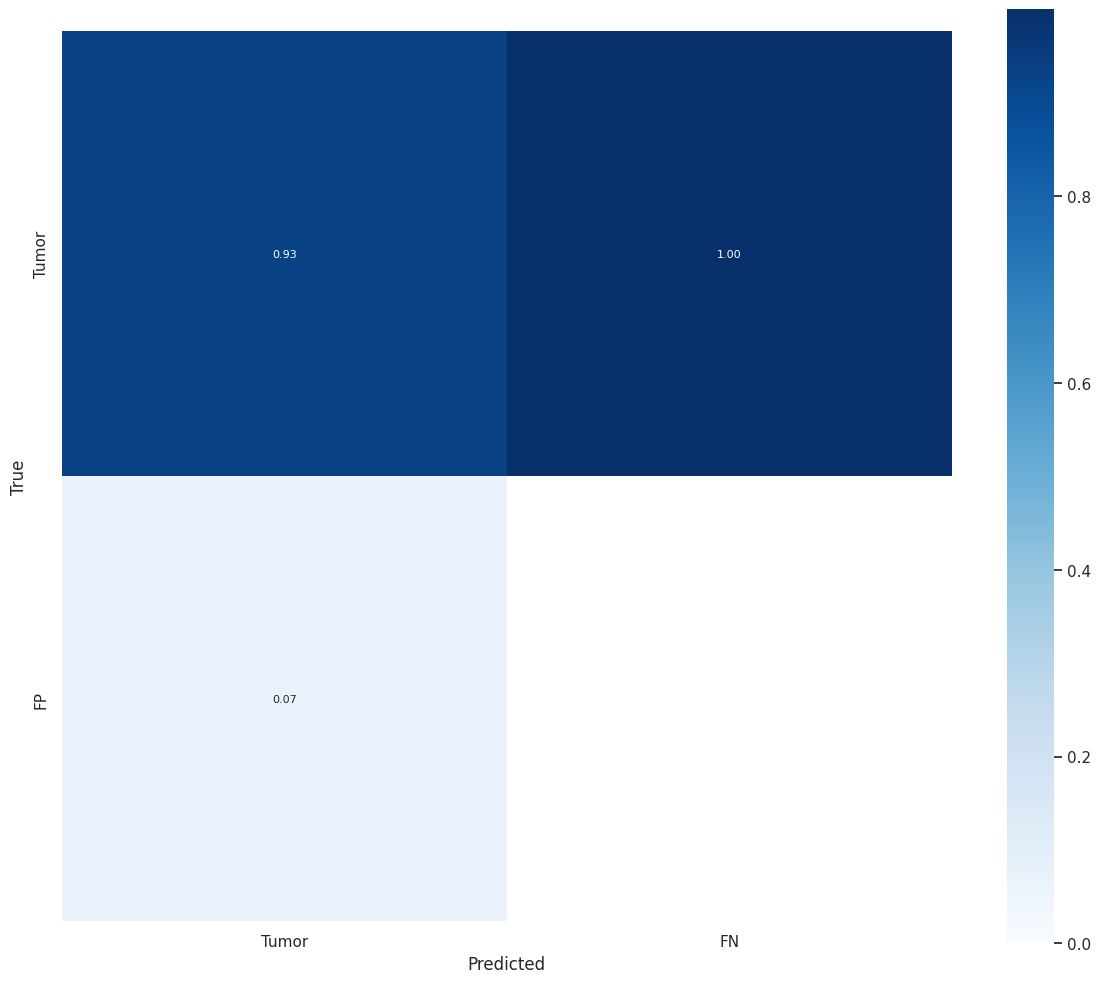

In [ ]:

import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join("/content", "confusion_matrix.png"), class_names=ds.classes)

In [32]:
import random
import supervision as sv

random.seed(10)

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

In [44]:
detections_list = []
prediction_list = []
for key in keys:
    # Para anotações
    annotation_detections = ds.annotations[key]
    for detection in annotation_detections:
        detections_list.append(detection[0])

    # Para previsões
    prediction_detections = predictions[key]
    for prediction in prediction_detections:
        prediction_list.append(prediction[0])

In [47]:
import numpy as np


def iou(box1, box2):
    # Verifica se as bounding boxes são válidas.
    if box1[2] is None or box2[2] is None:
        return 0.0

    # Calcula as interseções das bounding boxes.
    inter_top = np.maximum(box1[0], box2[0])
    inter_bottom = np.minimum(box1[2], box2[2])
    inter_left = np.maximum(box1[1], box2[1])
    inter_right = np.minimum(box1[3], box2[3])
    inter_area = (inter_right - inter_left) * (inter_bottom - inter_top)

    # Calcula as áreas das bounding boxes.
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calcula o IoU.
    iou = inter_area / (box1_area + box2_area - inter_area)

    return iou

for i in range(len(detections_list)):
  iou_score = iou(detections_list[i], prediction_list[i])

  # Imprime o IoU.
  print(iou_score)

0.8873508
0.8898279
0.91539186
0.91630524
0.8592779


<class 'list'>


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
